---

# **title: '머신러닝5 결정트리'**

# **date: '2022-07-04 11:00'**

---

## 결정트리(아주 중요)


In [139]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')
print(wine.head())

   alcohol  sugar    pH  class
0      9.4    1.9  3.51    0.0
1      9.8    2.6  3.20    0.0
2      9.8    2.3  3.26    0.0
3      9.8    1.9  3.16    0.0
4      9.4    1.9  3.51    0.0


- 데이터 가공하기.

In [140]:
data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()

- 훈련데이터 분리 

In [141]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target =train_test_split(
    data, target, test_size = 0.2, random_state=42
)

train_input.shape, test_input.shape, train_target.shape, test_target.shape

((5197, 3), (1300, 3), (5197,), (1300,))

In [142]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [143]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

0.7808350971714451
0.7776923076923077


In [144]:
print(lr.coef_,lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


- 모델만들기 

0.8766596113142198
0.8523076923076923


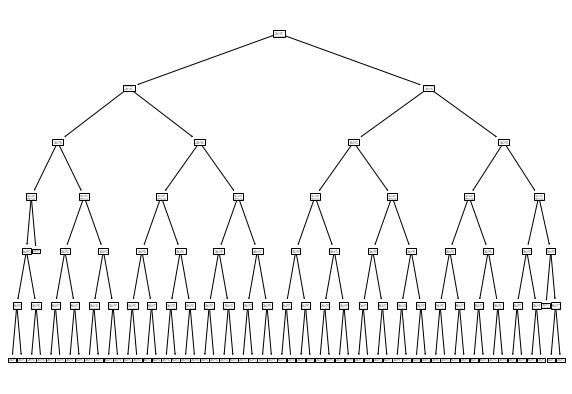

In [145]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

dt = DecisionTreeClassifier(max_depth= 6,random_state=42)#깊이를 줄여보자
dt.fit(train_scaled,train_target)
print(dt.score(train_scaled,train_target)) #훈련 셋트
print(dt.score(test_scaled,test_target)) #테스트 셋트

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

- 훈련정확도는 99.6%
- 테스트 정확도는 85.9%
  +->과대적합이 일어남
-max_depth= 7값을 조정하여 비슷하게 만듬

### 노드란 무엇인가?
- 0이면 레드 와인(1599)
- 1이면 화이트 와인(4898)
 

In [146]:
wine['class'].value_counts()

1.0    4898
0.0    1599
Name: class, dtype: int64

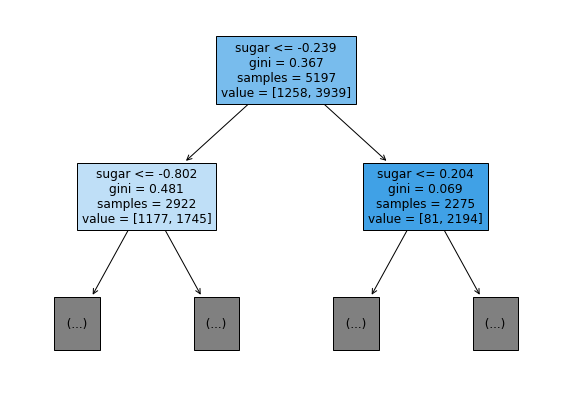

In [147]:
plt.figure(figsize=(10,7))
plot_tree(dt,
          max_depth=1, 
          filled=True, 
          feature_names=['alcohol','sugar','pH'])
plt.show()

- 불순도(Gini impurity)
 + 비율(0~0.5)
 + 레드와인:화이트 와인 이 5:5 일때 불순도가 가장 높은 상태(0.5)
 + 한범주안에서 서로 다른 데이터가 얼마나 섞여 있는지를 나타냄.
 + 흰색과 검은색이 각각 반반이면 불순도 최대 0.5
 + 흰색과 검은색이 완전 분리가 되면 
   - 흰색 노드 불순도 최소 0
   - 검은색 노드 불순도 최소 0

- 엔트로피(Entropy)
 + 불확실한 정도를 의미(0~1)
 + 흰색과 검은색이 각각 반이면 엔트로피 최대 1
 + 흰색과 검은색이 완전 분리가 되면
   - 흰색 노드 엔트로피도 0
   - 검은색 노드 엔트로피도 0 

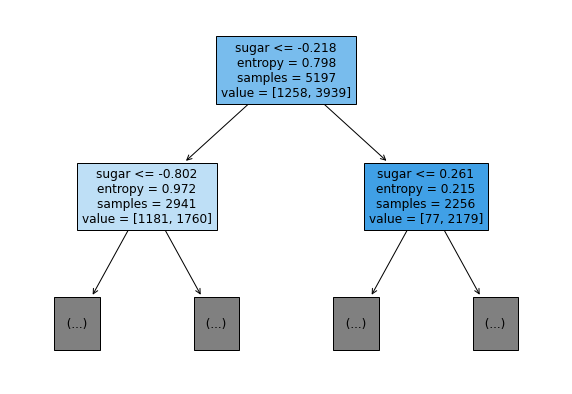

In [148]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 42, random_state=42)
dt.fit(train_scaled,train_target)
dt.score(train_scaled,train_target) #훈련 셋트
dt.score(test_scaled,test_target) #테스트 셋트
plt.figure(figsize=(10,7))
plot_tree(dt,
          max_depth=1, 
          filled=True, 
          feature_names=['alcohol','sugar','pH'])
plt.show()

### 특성 중요도
- 어떤 특성이 결정 트리 모델에 영향을 주었는가? 

In [149]:
print(dt.feature_importances_)

[0.23739824 0.5051808  0.25742097]


## 현업에서의 적용
- 현업에서 DecisionTreeClassifier을 사용하기에는 오래되었다.(1970년대)
- 렘덤포르세트, XGBoost 하이퍼 파라미터가 매우 많음


## 검증 세트
- 훈련세트와 테스트세트
- 훈련 : 교과서로 공부하는 것 
- 훈련세트 : 모의평가
- 검증 : 강남대성 모의고사
- 테스트 : 중간고사, 기말고사
- 실전 :수능

In [150]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')
data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()
#훈련 80%, 테스트 20%
train_input, test_input, train_target, test_target =train_test_split(
    data, target, test_size = 0.2, random_state=42
)
train_input.shape, test_input.shape, train_target.shape, test_target.shape

((5197, 3), (1300, 3), (5197,), (1300,))

In [151]:
#훈련80%, 검증20%
sub_input, val_input,sub_target,val_target = train_test_split(
    train_input, train_target, test_size =0.2, random_state=42
)
sub_input.shape,val_input.shape,sub_target.shape,val_target.shape

((4157, 3), (1040, 3), (4157,), (1040,))

- 훈련데이터: sub_input, sub_target
- 검증데이터: val_input, val_target
- 테스트데이터: test_input, test_target

In [152]:
from sklearn.tree import DecisionTreeClassifier
dt =DecisionTreeClassifier(random_state =42)
dt.fit(sub_input,sub_target)
print("훈련성과:",dt.score(sub_input,sub_target))
print("검증성과:",dt.score(val_input,val_target))
print("최종:",dt.score(test_input,test_target))

훈련성과: 0.9971133028626413
검증성과: 0.864423076923077
최종: 0.8569230769230769


- 훈련 : 87%
- 검증 : 86%->과대적합
------------
- 최종 : 85%

### 교차 검증
- 데이터 셋을 반복분할
- For loop
- 샘플링의 편향성을 방지
- 교차검증을 한다고 해서 정확도가 무조건 올라가는 것은 아님.
- 모형을 안정적으로 만들어줌(과대적합 방지)


In [153]:
from sklearn.model_selection import KFold
import numpy as np
df = np.array([1,2,3,4,5,6,7,8,9,10])

#데이터를 K폴드로 나눈다.
folds = KFold(n_splits=5, shuffle = True)
for train_idx,valid_idx in folds.split(df):
  print(f'훈련데이터:{df[train_idx]},검증데이터:{df[valid_idx]}')

훈련데이터:[1 2 3 4 5 6 8 9],검증데이터:[ 7 10]
훈련데이터:[ 1  2  3  4  6  7  8 10],검증데이터:[5 9]
훈련데이터:[ 1  2  4  5  7  8  9 10],검증데이터:[3 6]
훈련데이터:[ 1  3  4  5  6  7  9 10],검증데이터:[2 8]
훈련데이터:[ 2  3  5  6  7  8  9 10],검증데이터:[1 4]


- 교차 검증 함수
 + cross_validate()

In [154]:
from sklearn.model_selection import cross_validate
scores =cross_validate(dt,train_input,train_target)
print(scores)
print("평균:",np.mean(scores['test_score']))

{'fit_time': array([0.01610422, 0.00758529, 0.00780439, 0.00830793, 0.00751185]), 'score_time': array([0.00120473, 0.00096321, 0.00094819, 0.00098753, 0.00134945]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}
평균: 0.855300214703487


- StratifiedKFold 사용
 + 타깃클래스를 골고루 나누기 위함

In [155]:
from sklearn.model_selection import StratifiedKFold 
scores = cross_validate(dt, train_input, train_target, cv = StratifiedKFold())
print(scores)
print("평균 : ", np.mean(scores['test_score']))

{'fit_time': array([0.01418257, 0.00769162, 0.00846624, 0.00809741, 0.00809479]), 'score_time': array([0.00103283, 0.00094843, 0.00096679, 0.00104737, 0.00102282]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}
평균 :  0.855300214703487


- 10-폴드 교차 검증

In [156]:
from sklearn.model_selection import StratifiedKFold
splitter =StratifiedKFold(n_splits = 10,shuffle =True, random_state = 42)#10번 더 교차 검증을 수행
scores =cross_validate(dt,train_input,train_target,cv =splitter)
print(scores)
print("평균:",np.mean(scores['test_score']))

{'fit_time': array([0.01752782, 0.00863743, 0.00879025, 0.0088315 , 0.00837684,
       0.00851107, 0.00831246, 0.00826931, 0.00829077, 0.00844049]), 'score_time': array([0.00099802, 0.00086832, 0.00085974, 0.00183129, 0.00091791,
       0.0008316 , 0.00078368, 0.00092673, 0.00080705, 0.00082994]), 'test_score': array([0.83461538, 0.87884615, 0.85384615, 0.85384615, 0.84615385,
       0.87307692, 0.85961538, 0.85549133, 0.85163776, 0.86705202])}
평균: 0.8574181117533719


## 하이퍼 파라미터 튜닝
- 그리드 서치(사람이 수동입력)
 + max_depth: [1.3.5...]
- 랜덤 서치(사람이 범위만 지정)
 + max_depth: 1~10/by random
- 베이지안 옵티마이제이션
- 사람의 개입없이 하이퍼파라미터 튜닝을 자동적으로 수행하는 기술을 AutoML이라고 함
 + 예)PyCaret
- 각 모델마다 적게는 1-2개에서 많게는 5-6개의 매개 변수를 제공한다
- 하이퍼파라미터와 동시에 교차검증을 수행(불가능하다)
 + 교차검증 5번
  - 교차검증 1번 돌때, Max Depth3번 적용 총 결과값 3x5x2나옴
  - Max Death =1,3,7
  - criterion= gini.entropy 


In [158]:
from sklearn.model_selection import GridSearchCV
params = {
    'min_impurity_decrease' : [0.0001,0.0002,0.0003,0.0004,0.0005]
    
}
gs = GridSearchCV(DecisionTreeClassifier(random_state =42),params, n_jobs= -1)
gs.fit(train_input,train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [159]:
print("best:",gs.best_estimator_)
dt = gs.best_estimator_
print(dt.score(train_input, train_target))

best: DecisionTreeClassifier(min_impurity_decrease=0.0001, random_state=42)
0.9615162593804117


In [162]:
from sklearn.model_selection import GridSearchCV
params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth ': [1,3,7],
    'min_impurity_decrease' : [0.0001,0.0002,0.0003,0.0004,0.0005]
    
}
gs = GridSearchCV(DecisionTreeClassifier(random_state =42),params, n_jobs= -1)
gs.fit(train_input,train_target)
print("best:",gs.best_estimator_)
dt = gs.best_estimator_
print(dt.score(train_input, train_target))

best: DecisionTreeClassifier(max_depth=7, min_impurity_decrease=0.0005,
                       random_state=42)
0.8830094285164518
